In [433]:
import numpy as np
import csv
import json

In [434]:
import os
import pandas as pd

In [435]:
# create a table to record the occurrance of coordinates
record_table = np.zeros((85,200))
record_table

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [436]:
def get_league_average_table(year):
    
    csv_path = f'/Users/xiaoxinzhou/Documents/IFT6758_CSV_data/regular_season/{year}'

    league_total_table = np.zeros((85, 200))

    for filename in os.listdir(csv_path):
        # print(filename)
        # df = pd.read_csv(f'{csv_path}/{filename}')

        with open(csv_path + '/' + filename) as csvfile:
            data = csv.DictReader(csvfile)
            
            #open corresponding json file and get start home court side
            f = open(f'/Users/xiaoxinzhou/Documents/IFT6758_JSON_data/regular_season/{year}/{filename[:-4]}.json')
            loaded_json = json.load(f)
            home_side = loaded_json['liveData']['linescore']['periods'][0]['home'].get('rinkSide')
                    
            for row in data:

                y_coor = row.get('Y-Coordinate') 
                x_coor = row.get('X-Coordinate')

                y_coor = int(float(y_coor)) if bool(y_coor) and y_coor != 'NA' else False
                x_coor = int(float(x_coor)) if bool(x_coor) and x_coor != 'NA' else False

                if x_coor and y_coor:
                    if home_side == 'right':                    
                        if row.get('Home or Away') == 'Home':
                            if int(row.get('Period')) % 2 == 1:
                                # print(row.get('Y-Coordinate'))
                                # shoot left
                                league_total_table[42 - y_coor, 100 + x_coor] += 1

                            elif int(row.get('Period')) % 2 == 0:
                                # shoot right
                                league_total_table[42 + y_coor, 100 - x_coor] += 1
                        else:
                            if int(row.get('Period')) % 2 == 1:
                                # shoot right
                                league_total_table[42 + y_coor, 100 - x_coor] += 1

                            elif int(row.get('Period')) % 2 == 0:
                                # shoot left
                                league_total_table[42 - y_coor, 100 + x_coor] += 1
                                
                    elif home_side == 'left':
                        if row.get('Home or Away') == 'Home':
                            if int(row.get('Period')) % 2 == 1:
                                # print(row.get('Y-Coordinate'))
                                # shoot right
                                league_total_table[42 + y_coor, 100 - x_coor] += 1

                            elif int(row.get('Period')) % 2 == 0:
                                # shoot left
                                league_total_table[42 - y_coor, 100 + x_coor] += 1
                        else:
                            if int(row.get('Period')) % 2 == 1:
                                # shoot left
                                league_total_table[42 - y_coor, 100 + x_coor] += 1

                            elif int(row.get('Period')) % 2 == 0:
                                # shoot right
                                league_total_table[42 + y_coor, 100 - x_coor] += 1

    num_teams = 30 if int(year) == 2016 else 31
    league_average_table = league_total_table / num_teams
    # print(league_average_table)
    return league_average_table

In [457]:
league_average_table = get_league_average_table('2016')

In [438]:
np.nonzero(league_average_table)

(array([ 0,  0,  0, ..., 84, 84, 84]), array([22, 27, 63, ..., 35, 48, 61]))

In [439]:
def get_team_table(team, year):
    
    csv_path = f'/Users/xiaoxinzhou/Documents/IFT6758_CSV_data/regular_season/{year}'

    team_table = np.zeros((85, 200))

    for filename in os.listdir(csv_path):
        # print(filename)
        # df = pd.read_csv(f'{csv_path}/{filename}')

        #open corresponding json file and get start home court side
        f = open(f'/Users/xiaoxinzhou/Documents/IFT6758_JSON_data/regular_season/{year}/{filename[:-4]}.json')
        loaded_json = json.load(f)
        home_side = loaded_json['liveData']['linescore']['periods'][0]['home'].get('rinkSide')
        home_team = loaded_json['gameData']['teams']['home'].get('name')
        away_team = loaded_json['gameData']['teams']['away'].get('name')
        
        if team == home_team or team == away_team:
            with open(csv_path + '/' + filename) as csvfile:
                data = csv.DictReader(csvfile)

                for row in data:
                    if row.get('Team Name') == team:
                        y_coor = row.get('Y-Coordinate')
                        x_coor = row.get('X-Coordinate')

                        y_coor = int(float(y_coor)) if bool(y_coor) and y_coor != 'NA' else False
                        x_coor = int(float(x_coor)) if bool(x_coor) and x_coor != 'NA' else False

                        if x_coor and y_coor:
                            if home_side == 'right':
                                if row.get('Home or Away') == 'Home':
                                    if int(row.get('Period')) % 2 == 1:
                                        # print(row.get('Y-Coordinate'))
                                        # shoot left
                                        team_table[42 - y_coor, 100 + x_coor] += 1

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot right
                                        team_table[42 + y_coor, 100 - x_coor] += 1
                                else:
                                    if int(row.get('Period')) % 2 == 1:
                                        # shoot right
                                        team_table[42 + y_coor, 100 - x_coor] += 1

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot left
                                        team_table[42 - y_coor, 100 + x_coor] += 1
                                        
                            elif home_side == 'left':
                                if row.get('Home or Away') == 'Home':
                                    if int(row.get('Period')) % 2 == 1:
                                        # print(row.get('Y-Coordinate'))
                                        # shoot right
                                        team_table[42 + y_coor, 100 - x_coor] += 1

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot left
                                        team_table[42 - y_coor, 100 + x_coor] += 1
                                else:
                                    if int(row.get('Period')) % 2 == 1:
                                        # shoot left
                                        team_table[42 - y_coor, 100 + x_coor] += 1

                                    elif int(row.get('Period')) % 2 == 0:
                                        # shoot right
                                        team_table[42 + y_coor, 100 - x_coor] += 1

    return team_table

In [441]:
team_table = get_team_table('Colorado Avalanche', '2016')

In [442]:
np.nonzero(team_table)

(array([ 1,  1,  2, ..., 81, 81, 82]), array([13, 32, 32, ..., 73, 90, 23]))

In [443]:
def get_excess_shots_table(team, year):
    league_average_table = get_league_average_table(year)
    team_table = get_team_table(team, year)
    excess_shots_table = team_table - league_average_table
    
    # print(excess_shots_table)
    return excess_shots_table

In [444]:
excess_shots_table = get_excess_shots_table('Colorado Avalanche', '2016')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [445]:
np.nonzero(excess_shots_table)

(array([ 0,  0,  0, ..., 84, 84, 84]), array([13, 22, 24, ..., 31, 44, 45]))

In [446]:
df_excess = pd.DataFrame(excess_shots_table)
df_excess

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [447]:
df_excess.to_csv('/Users/xiaoxinzhou/Documents/df_excess.csv')

In [455]:
df_tmp = team_table*30-league_average_table*30

np.nonzero(df_tmp)

(array([ 0,  0,  0, ..., 84, 84, 84]), array([22, 27, 63, ..., 35, 48, 61]))

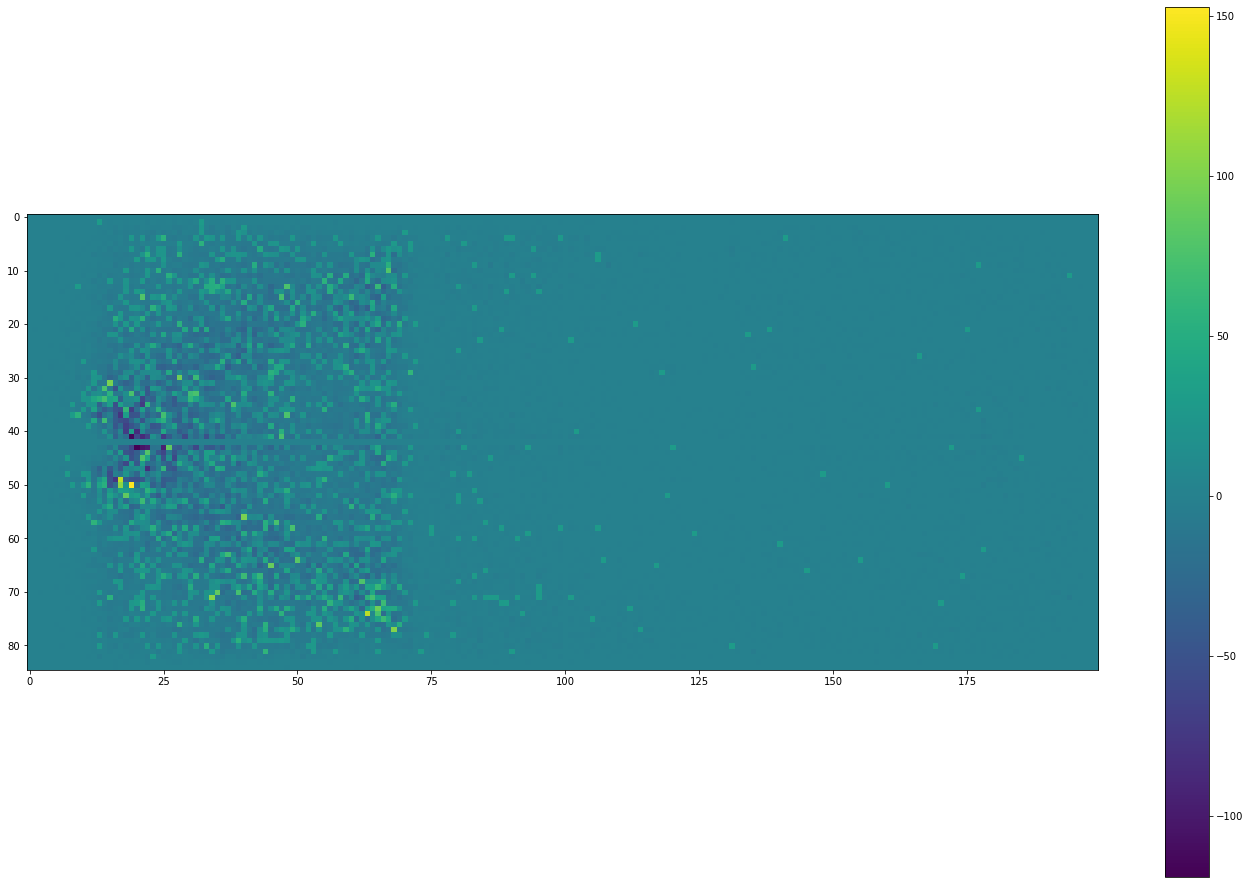

In [456]:
im = plt.imshow(df_tmp, interpolation='nearest')

# plt.figure(figsize=(12, 8))
plt.colorbar(im)
plt.show()

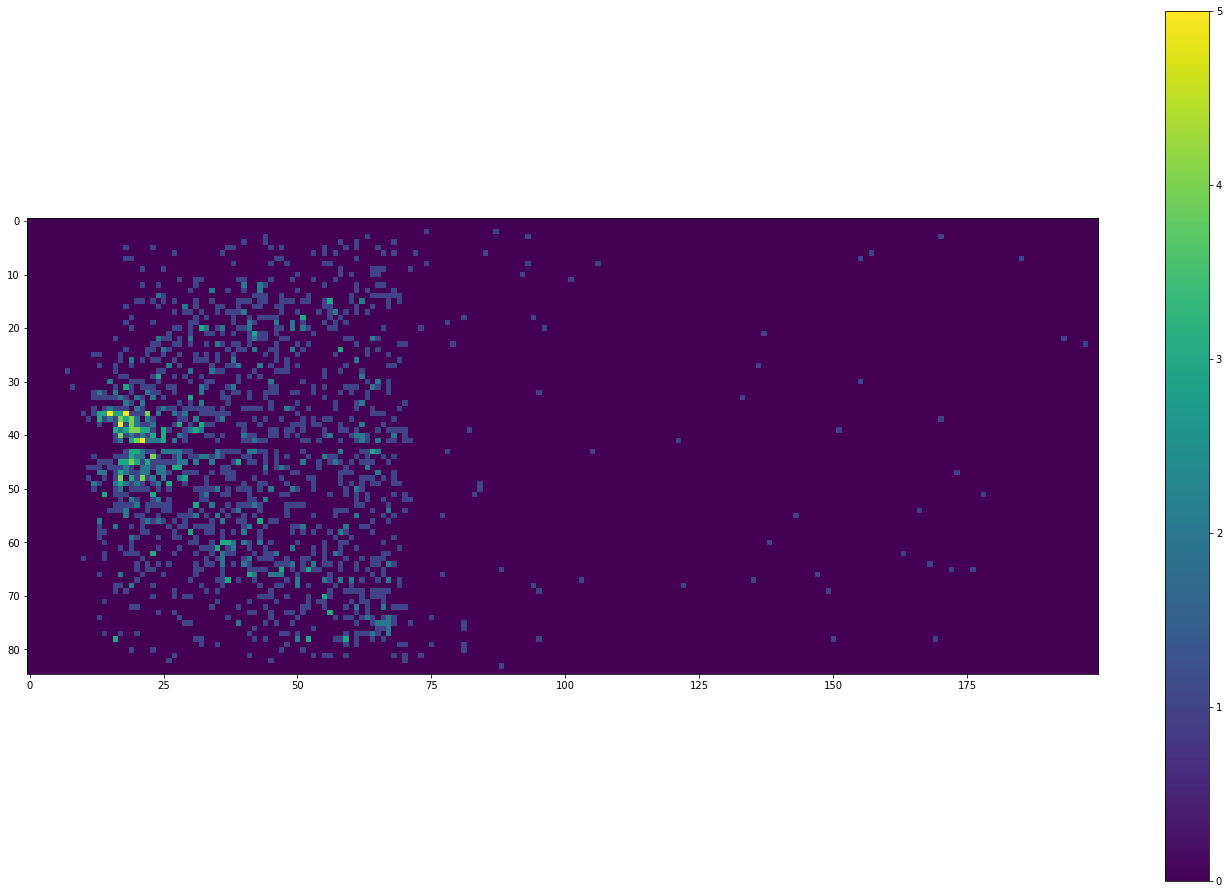

In [458]:
league_average_table_2020 = get_league_average_table('2020')
team_table_COL = get_team_table('Colorado Avalanche', '2020')
im = plt.imshow(team_table_COL, interpolation='nearest')

# plt.figure(figsize=(12, 8))
plt.colorbar(im)
plt.show()

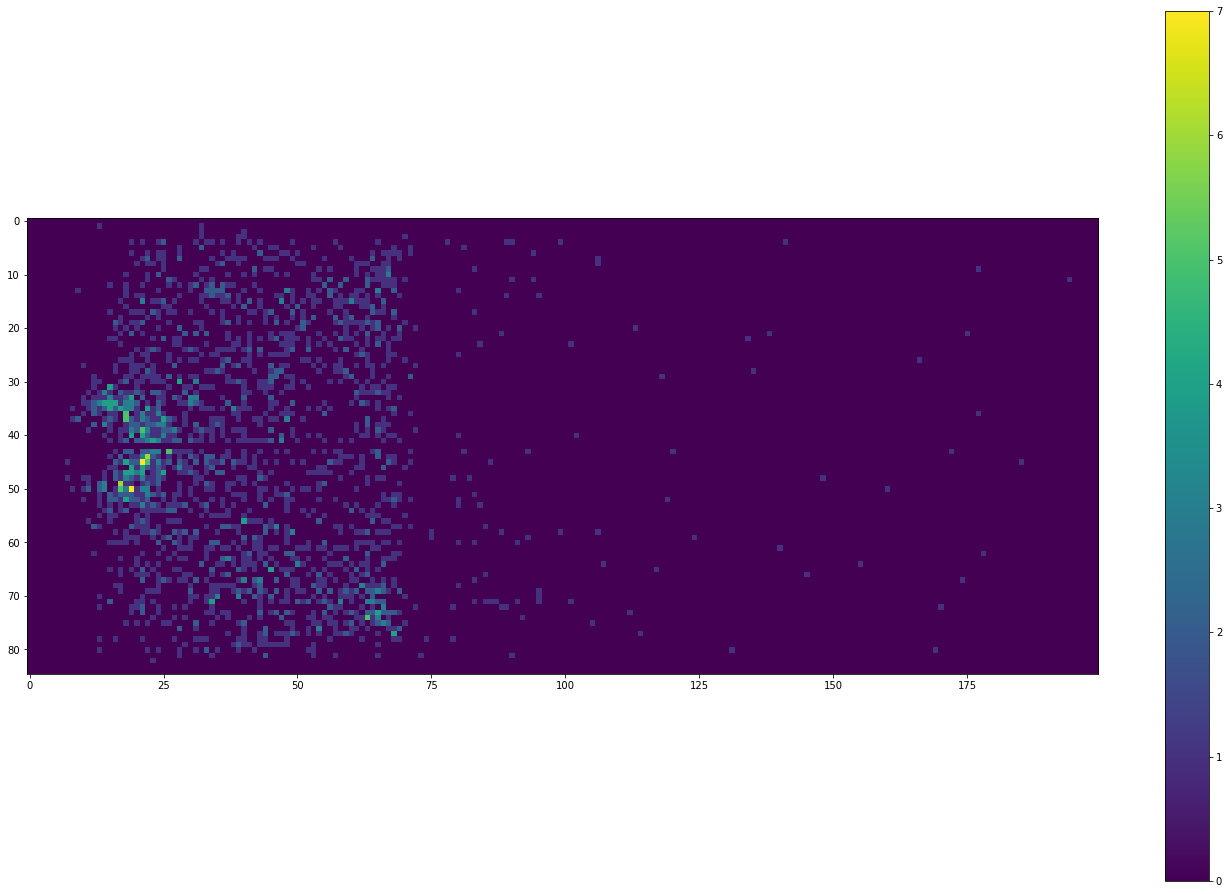

In [459]:
team_table_COL = get_team_table('Colorado Avalanche', '2016')
im = plt.imshow(team_table_COL, interpolation='nearest')

# plt.figure(figsize=(12, 8))
plt.colorbar(im)
plt.show()

In [475]:
import ipywidgets as widgets
@widgets.interact(year=['2016', '2017', '2018', '2019', '2020'], team='Please enter a team name') #Colorado Avalanche
def find_x_y(year, team):
    
    # calculate the team table
    team_table = get_team_table(team, year)
    img = plt.imread("../../figures/nhl_rink.png")
    im1 = plt.imshow(team_table, interpolation='nearest')
    im2 = plt.imshow(img, extent=[0, 200, 0, 85])

    plt.colorbar(im)
    plt.show()
    print(team)
    


interactive(children=(Dropdown(description='year', options=('2016', '2017', '2018', '2019', '2020'), value='20…

In [482]:
import plotly.graph_objects as go

import pandas as pd

# load dataset
#team_table = get_team_table(team, year)
shotmap_df = pd.DataFrame(team_table)
n1=85
n2=200
x = np.linspace(0, 100, n1)
y = np.linspace(-42.5, 42.5, n2)
fig = go.Figure()

fig.add_trace(
    go.Contour(
        z=np.array(shotmap_df[shotmap_df.columns[0]]).reshape(n2,n1),
        x=x,
        y=y,
        hoverongaps = False,
        opacity = 0.3,
        zmin=-0.55, zmax=0.55,
        colorbar=dict(title='Excess shots per hour per 100 sqft', titleside='right')
    )
)

updatemenus = [
    {
        'buttons': 
           [{'method': 'restyle', 'label': col,'args': [{'z': [np.array(shotmap_df[col]).reshape(n2,n1)]}]} for col in shotmap_df.columns],
        'direction': 'down',
        'showactive': True,

    }
]

fig.layout = go.Layout(
    updatemenus=updatemenus,
    title="Shot Map for Team Relative to League-Wide Season Average"
)

img_width = rink_image.size[0]
img_height = rink_image.size[1]
scale_factor = 1/5.5


fig.update_xaxes(
    visible=True,
    range=[0, 100 ]
)

fig.update_yaxes(
    visible=True,
    range=[-42.5, 42.5],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add images
fig.add_layout_image(
        dict(
            source=rink_image,
            xref="x",
            yref="y",
            x=0,
            sizex=img_width * scale_factor,
            y=42.5,
            sizey=img_height * scale_factor,
            sizing="stretch",
            opacity=1,
            layer="below"
        )
)

fig.update_layout(
    autosize=False,
    width=img_width*1.5,
    height=img_height*1.5)

#fig.write_html(PLOT_PATH)

fig.show()

ValueError: cannot reshape array of size 85 into shape (200,85)

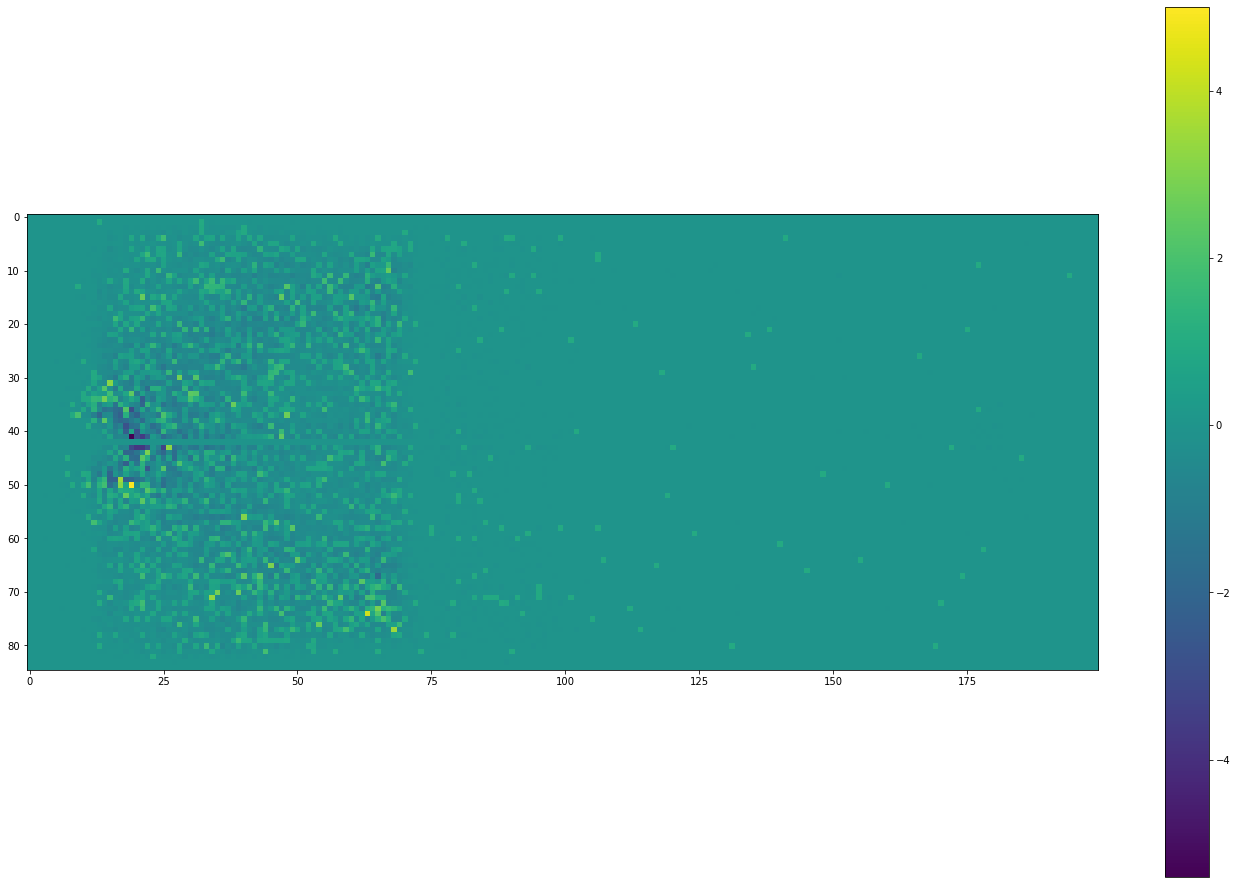

In [448]:
import matplotlib.pyplot as plt

im = plt.imshow(excess_shots_table, interpolation='nearest')

# plt.figure(figsize=(12, 8))
plt.colorbar(im)
plt.show()

In [ ]:
def np_array_to_pd_dataframe(table):
    

In [124]:
csv_data = '/Users/xiaoxinzhou/Documents/IFT6758_CSV_data/regular_season/2018/2018021114.csv'
df = pd.read_csv(csv_data)

In [323]:
def get_xy(x, y, x_axis, y_axis):
    #7 ---------|---------
    #      A    |    B
    #0 ---------|---------
    #      C    |    D
    #-7 --------|---------
    #-10     0         10    
    
    res_x = 0
    res_y = 0
    
    # zone A
    if x<0 and y>0:
        res_x = y_axis - y
        res_y = x_axis + x
    
    # zone B
    elif x>0 and y>0:
        res_x = y_axis - y
        res_y = x_axis + x
    
    # zone C
    elif x<0 and y<0:
        res_x = y_axis - y
        res_y = x_axis + x
        
    # zone D
    else:
        res_x = y_axis - y
        res_y = x_axis + x
        
    return res_x, res_y

In [419]:
get_xy(-40,50,43,100)

(50, 3)

In [420]:
# as TA comments on Piazza: 
# league average = (sum of shots + goals per position) / the number of teams 
def get_league_average_table_v2(year):
    
    coordinates_df = pd.DataFrame(columns=['x-coor', 'y-coor'])
    
    csv_path = f'/Users/xiaoxinzhou/Documents/IFT6758_CSV_data/regular_season/{year}'

    # initialize a set to save team names
    team_set = set([])

    league_total_table = np.zeros((85, 200))

    for filename in os.listdir(csv_path):

        with open(csv_path + '/' + filename) as csvfile:
            data = csv.DictReader(csvfile)

            for row in data:
                # calculate league_total_table: sum of goals and shots per position
                y_coor = row.get('Y-Coordinate') 
                x_coor = row.get('X-Coordinate')

                y_coor = int(float(y_coor)) if bool(y_coor) and y_coor != 'NA' else False
                x_coor = int(float(x_coor)) if bool(x_coor) and x_coor != 'NA' else False

                if x_coor and y_coor:
                    # For example, in one game, WIG is home, period is 1, WIG shots in A and C
                    # Away        Home
                    #---------|---------
                    #    A    |    B
                    #---------|---------
                    #    C    |    D
                    #---------|---------
                    #-100     0         100

                    # When period is 2, WIG still home, WIG shots in B and D
                    # Home        Away
                    #---------|---------
                    #    A    |    B
                    #---------|---------
                    #    C    |    D
                    #---------|---------
                    #-100     0         100

                    new_x, new_y = get_xy(x_coor, y_coor, 100, 43)

                    # flip right side to left
                    if new_y > 100:
                        new_y = 200-new_y
                        new_x = 43*2-new_x

                    league_total_table[new_x][new_y] += 1

                    # add coordinates to a df
                    coordinates_df = coordinates_df.append({
                        'x-coor': new_x,
                        'y-coor': new_y,
                    }, ignore_index=True)

                # calculate the number of teams in current season
                team_set.add(row.get('Team Name'))

    print(team_set)
    league_average_table = league_total_table / len(team_set)

    print(league_average_table)
    # return league_average_table
    return league_average_table, coordinates_df

In [378]:
league_average_table_v2, coordinates_df = get_league_average_table_v2()

{'Philadelphia Flyers', 'Vancouver Canucks', 'St. Louis Blues', 'Ottawa Senators', 'Toronto Maple Leafs', 'Vegas Golden Knights', 'New York Rangers', 'New York Islanders', 'New Jersey Devils', 'Winnipeg Jets', 'Chicago Blackhawks', 'Boston Bruins', 'Detroit Red Wings', 'San Jose Sharks', 'Anaheim Ducks', 'Florida Panthers', 'Montréal Canadiens', 'Columbus Blue Jackets', 'Calgary Flames', 'Nashville Predators', 'Buffalo Sabres', 'Edmonton Oilers', 'Tampa Bay Lightning', 'Minnesota Wild', 'Colorado Avalanche', 'Dallas Stars', 'Los Angeles Kings', 'Carolina Hurricanes', 'Arizona Coyotes', 'Washington Capitals', 'Pittsburgh Penguins'}
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.03225806]
 ...
 [0.         0.         0.         ... 0.03225806 0.         0.03225806]
 [0.         0.         0.         ... 0.         0.         0.0

In [380]:
pd.DataFrame(league_average_table_v2).to_csv('/Users/xiaoxinzhou/Documents/league_total_table_v2.csv')

In [379]:
coordinates_df.to_csv('/Users/xiaoxinzhou/Documents/coordinates_df_v2.csv')

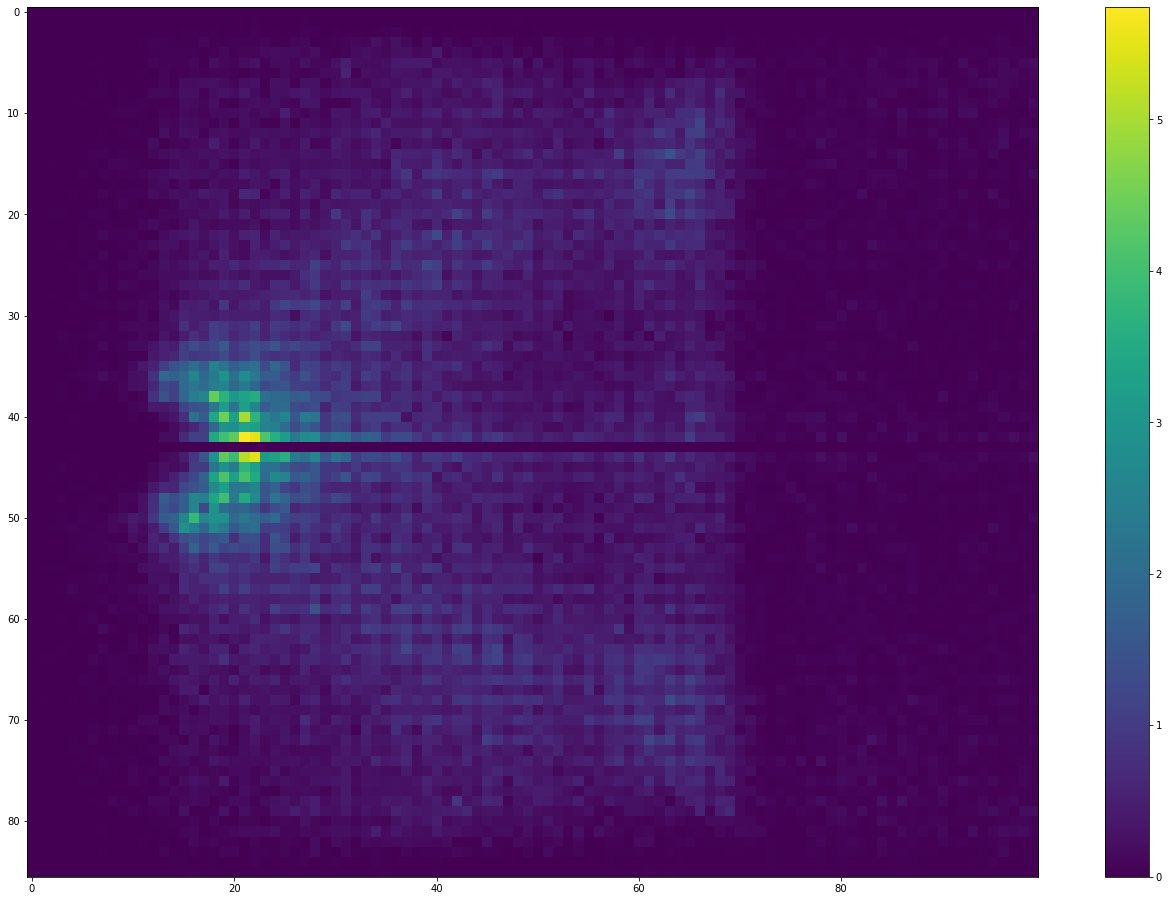

In [372]:
league_v2_df = pd.DataFrame(league_average_table_v2)

im = plt.imshow(league_v2_df, interpolation='nearest')

# plt.figure(figsize=(12, 8))
plt.colorbar(im)
plt.show()

In [377]:
from scipy.stats import gaussian_kde

density = gaussian_kde(league_v2_df.to_numpy().T)
xs = np.linspace(0,8,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

LinAlgError: singular matrix

In [397]:
def get_team_average_table_v2(team, year):
    
    csv_path = f'/Users/xiaoxinzhou/Documents/IFT6758_CSV_data/regular_season/{year}'

    team_total_table = np.zeros((86, 100))

    for filename in os.listdir(csv_path):

        with open(csv_path + '/' + filename) as csvfile:
            data = csv.DictReader(csvfile)

            team_game_table = np.zeros((86, 100))

            game_shot_count = 0

            did_team_play = False
            
            for row in data:
                if row.get('Team Name') == team:
                    did_team_play = True
                    y_coor = row.get('Y-Coordinate')
                    x_coor = row.get('X-Coordinate')

                    y_coor = int(float(y_coor)) if bool(y_coor) and y_coor != 'NA' else False
                    x_coor = int(float(x_coor)) if bool(x_coor) and x_coor != 'NA' else False

                    if x_coor and y_coor:

                        new_x, new_y = get_xy(x_coor, y_coor, 100, 43)
                        
                        # flip right side to left
                        if new_y > 100:
                            new_y = 200-new_y
                        
                        team_total_table[new_x][new_y] += 1
                        
                        # add coordinates to a df
                        # coordinates_df = coordinates_df.append({
                        #     'x-coor': new_x,
                        #     'y-coor': new_y,
                        # }, ignore_index=True)

            # if did_team_play:
            #     team_game_table = team_game_table / game_shot_count
            #     team_total_table = team_total_table + team_game_table
            
    team_average_table = team_total_table / 82

    # print(team_average_table)
    return team_average_table

In [398]:
team_total_table_v2 = get_team_average_table_v2('Colorado Avalanche', '2016')
team_total_table_v2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [401]:
l_df = pd.DataFrame(league_average_table_v2).shape

In [402]:
t_df = pd.DataFrame(team_total_table_v2).shape

In [393]:
pd.DataFrame(team_total_table_v2).to_csv('/Users/xiaoxinzhou/Documents/team_total_table_v2.csv')

In [382]:
def get_excess_shots_table_v2(team, season):
    league_average_table = get_league_average_table_v2()
    team_average_table = get_team_average_table_v2(team, season)
    
    league_df = pd.DataFrame(league_average_table)
    team_df = pd.DataFrame(team_average_table)
    
    print(f'league_df shape: {league_df.shape}')
    print(f'team_df shape: {team_df.shape}')
    
    excess_shots_table = team_average_table-league_average_table
    
    print(excess_shots_table)
    return excess_shots_table

In [404]:
excess_shots_v2 = get_excess_shots_table_v2('Colorado Avalanche', '2016')

KeyboardInterrupt: 

In [406]:
tmp_excess = team_total_table_v2-league_average_table_v2

In [407]:
tmp_excess

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.03225806],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.03225806,
         0.        , -0.03225806],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.03225806],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [411]:
import scipy.stats as st

#data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
data = tmp_excess
x = data[:, 0]
y = data[:, 1]
xmin, xmax = 0, 100
ymin, ymax = 0, 86
data


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.03225806],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.03225806,
         0.        , -0.03225806],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.03225806],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [5]:
import pandas as pd
df = pd.DataFrame([[1,2],[3,4],[5,6]])
df

,0,1
0,1,2
1,3,4
2,5,6


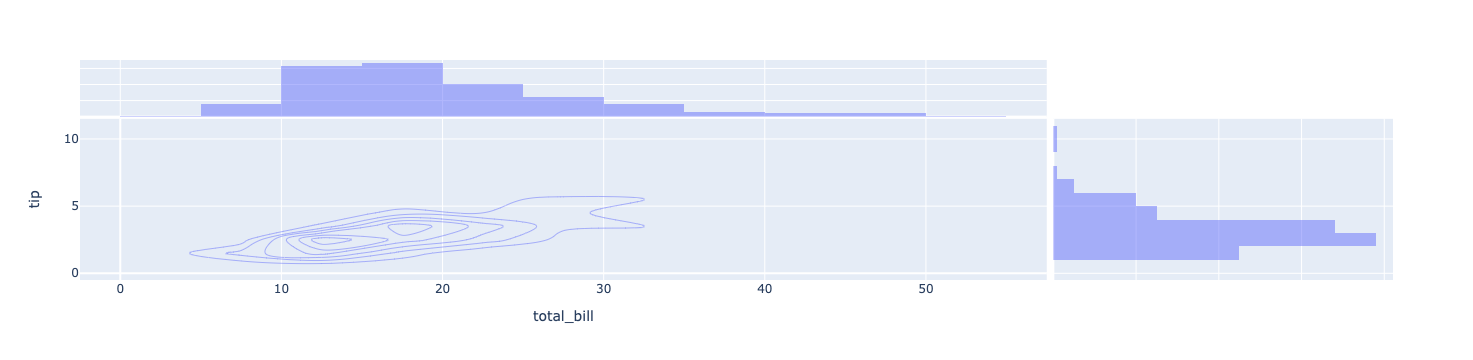

In [22]:
import numpy as np

import plotly.express as px
df = px.data.tips()

fig = px.density_contour(df, x="total_bill", y="tip", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df.iloc[3]['tip']

3.31

In [58]:
team_df = pd.read_csv('/Users/xiaoxinzhou/Documents/test.csv')

In [61]:
team_df.at[30,'28']

4.0

In [67]:
type(team_df.at[30,'28'])

numpy.float64

In [73]:
x = np.arange(0, 200, 1)
y = np.arange(0, 85, 10)

X, Y = np.meshgrid(x, y)
x

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190])

In [74]:
import plotly.offline as pyo
import plotly.express as px  # (version 4.7.0 or higher)
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output

fig = go.Figure()
x=np.arange(0,200)
y=np.arange(0,85)
fig.add_trace(
    go.Contour(
        x=x,
        y=y,
        z=team_df.at[y,str(x)]
    )
)

fig.show()

KeyError: '[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17\n  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35\n  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53\n  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71\n  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89\n  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107\n 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125\n 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143\n 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161\n 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179\n 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197\n 198 199]'

In [95]:
colorscale = [[0, 'lightsalmon'], [0.5, 'mediumturquoise'], [1, 'gold']]

fig = go.Figure(data =
    go.Contour(
        z=team_df,
        contours=dict(
        start=0,
        end=8,
        size=1,
        ),
        contours_coloring='heatmap',
        colorscale=colorscale,
        line_smoothing=0.85,
        connectgaps=True, 
    ))

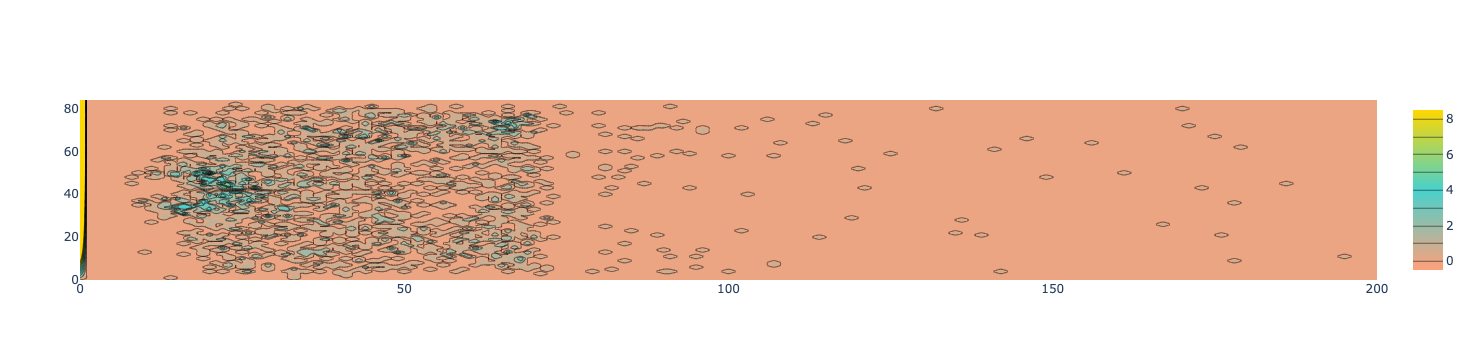

In [96]:
fig.show()

In [ ]:
# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = pl.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

pl.show()

In [412]:
coordinates_df

,x-coor,y-coor
0,36,25
1,41,34
2,39,22
3,58,66
4,27,61
...,...,...
78256,18,53
78257,71,37
78258,20,39
78259,39,19


In [413]:
coordinates_df['x-coor']

0        36
1        41
2        39
3        58
4        27
         ..
78256    18
78257    71
78258    20
78259    39
78260    69
Name: x-coor, Length: 78261, dtype: object

/usr/local/Caskroom/miniforge/base/envs/ift6758-conda-env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


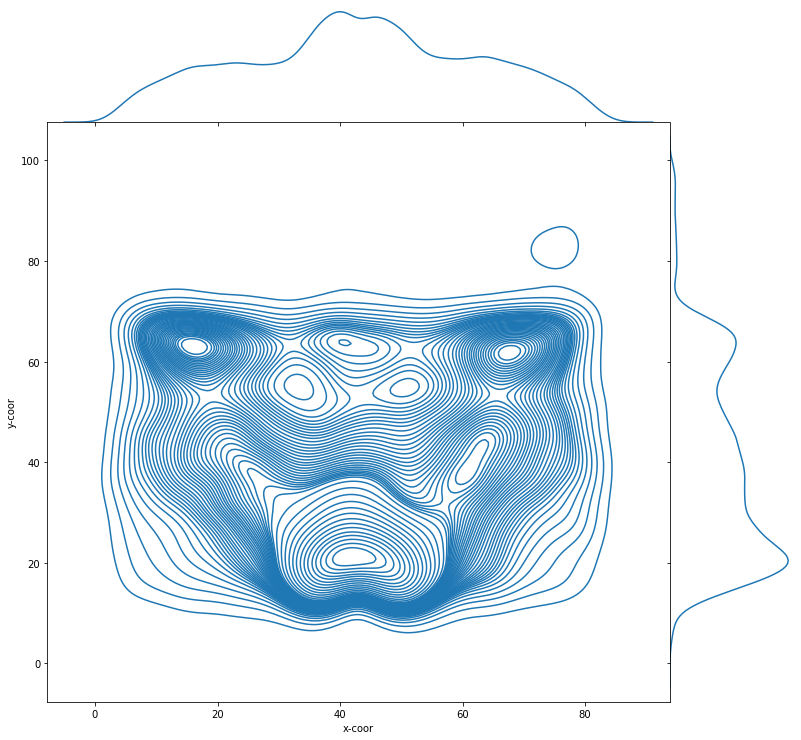

In [416]:
joint_shot_chart = sns.jointplot(coordinates_df['x-coor'], coordinates_df['y-coor'],
                                 kind='kde', space=0,
                                n_levels=50)

joint_shot_chart.fig.set_size_inches(12,11)

In [417]:
joint_shot_chart